# Case study on unsupervised learning

Try out different clustering models in the given dataset. Find the optimum
number of clusters in each model and create the model with optimum number of
clusters. Also learn about dB scan clustering and implement it.


Importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset into python environment.

In [2]:
data = pd.read_csv(r"C:\Users\ALFRED\Downloads\Wine_clust .csv")

Analysing the data and doing necessary preprocessing.

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Missing value handling

In [7]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Here, there are no missing values in this dataset.

In [8]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

Outlier handling

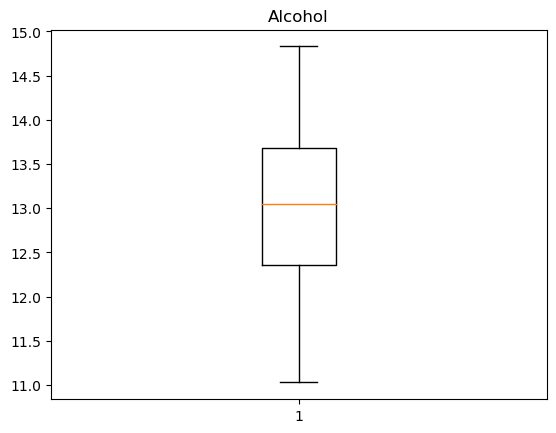

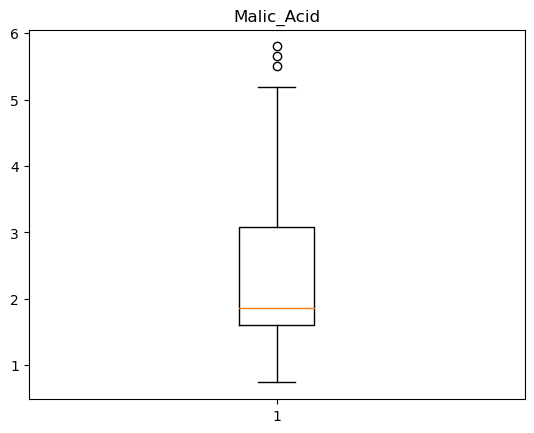

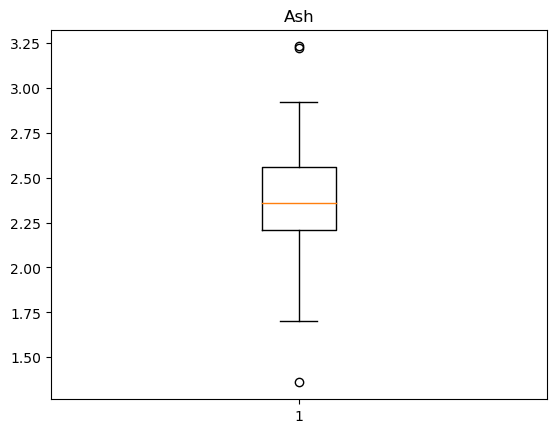

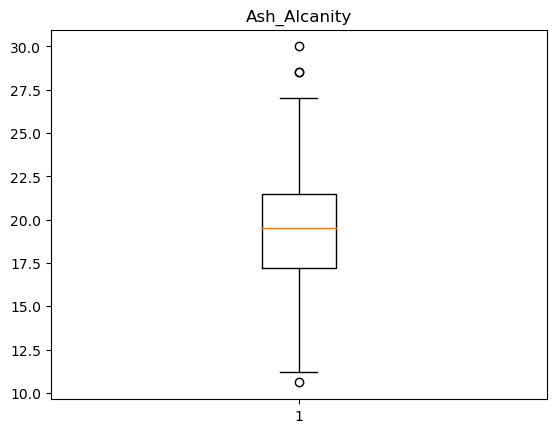

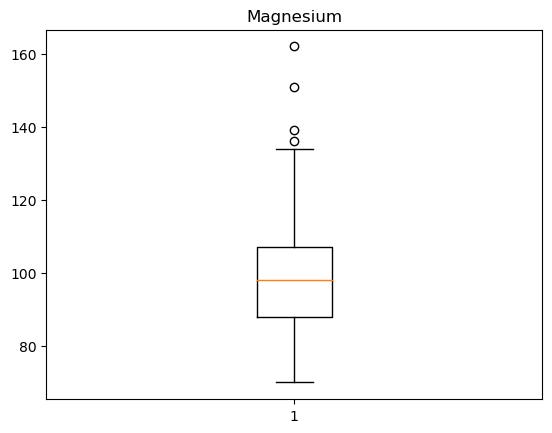

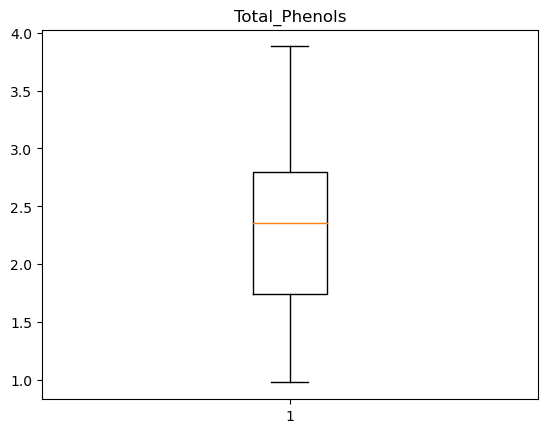

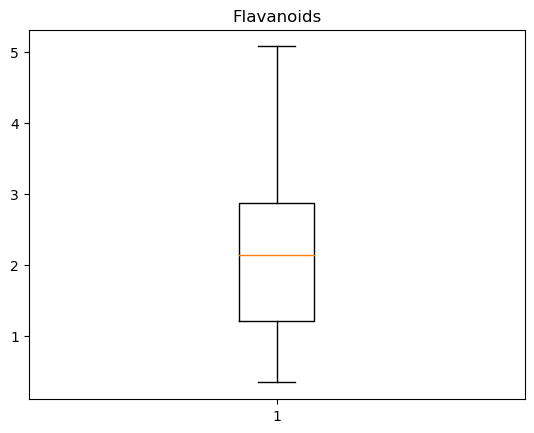

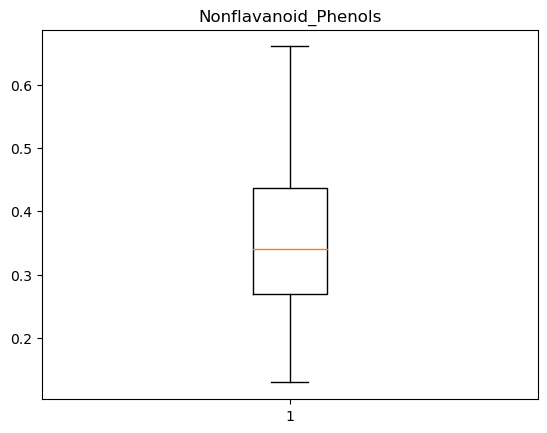

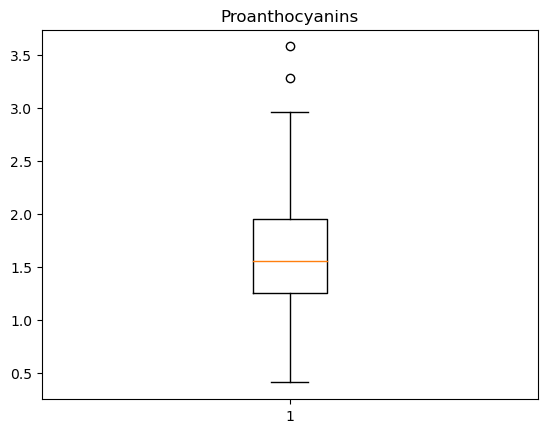

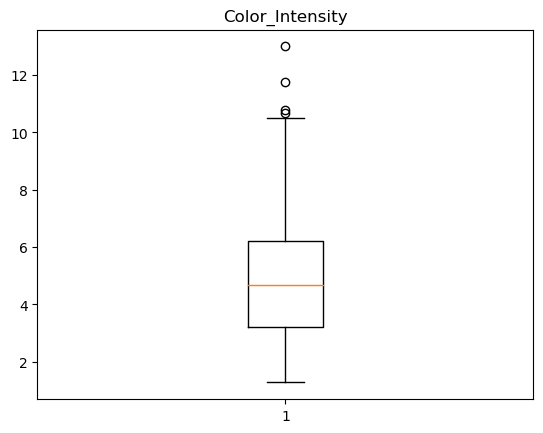

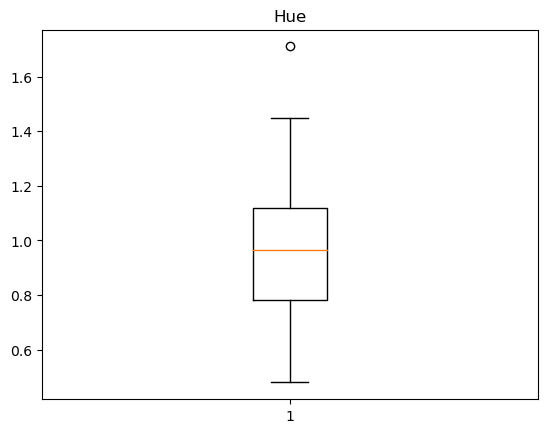

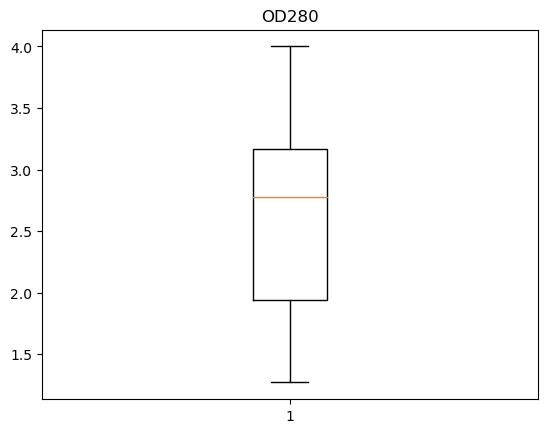

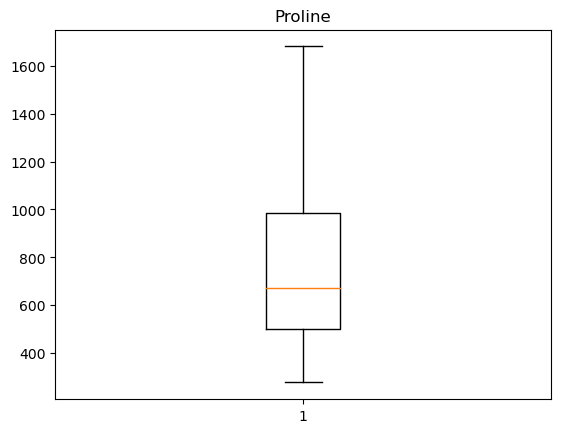

In [9]:
for i in data.columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [10]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [11]:
outlier_columns = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']

In [12]:
for i in outlier_columns:
    
    Q1 = np.percentile(data[i], 25, interpolation = 'midpoint')
    Q2 = np.percentile(data[i], 50, interpolation = 'midpoint')
    Q3 = np.percentile(data[i], 75, interpolation = 'midpoint')
   
    
    IQR = Q3 - Q1
    
    
    up_lim = Q3+1.5*IQR
    low_lim = Q1 - 1.5*IQR
    
    
    outliers = []
    for x in data[i]:
        if(x>up_lim) or (x<low_lim):
            outliers.append(x)
            
    data[i] = np.where(data[i]>up_lim,up_lim,np.where(data[i]<low_lim,low_lim,data[i]))

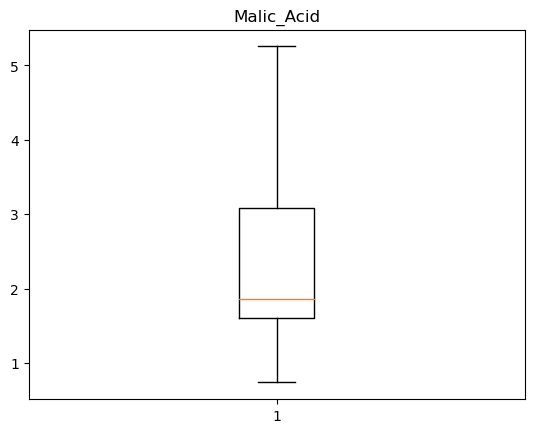

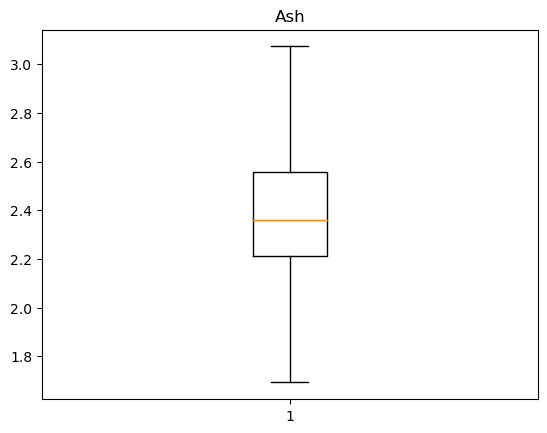

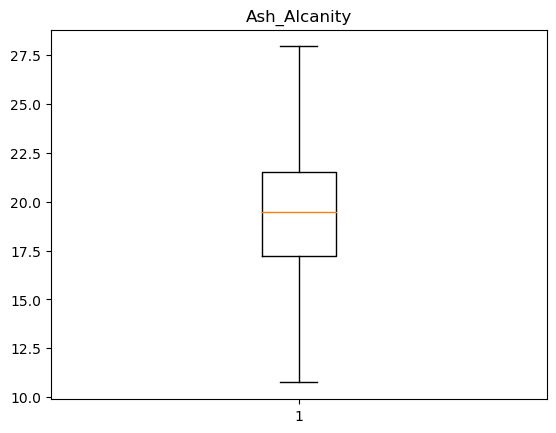

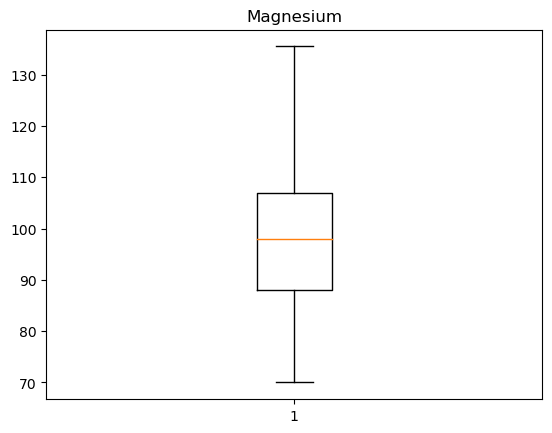

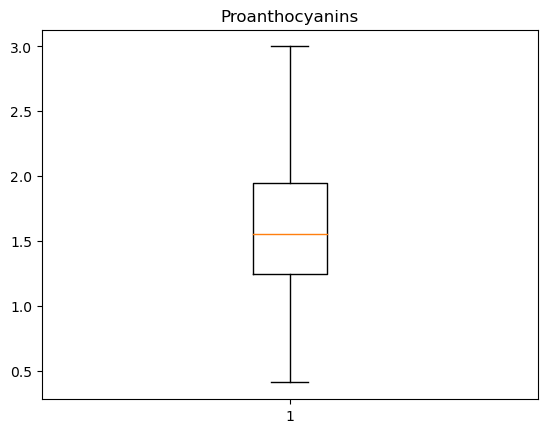

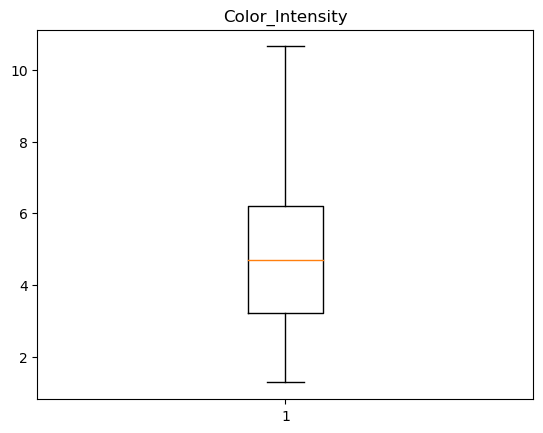

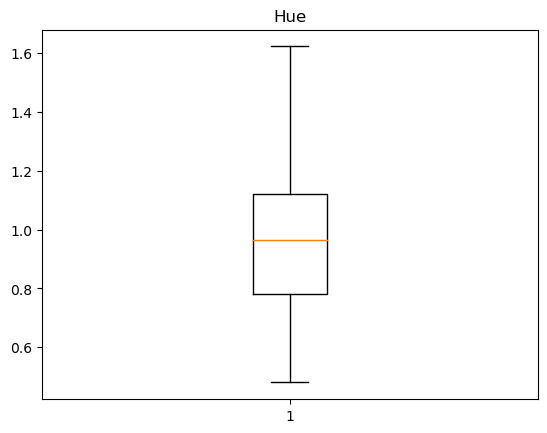

In [13]:
for i in outlier_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

Here 7 of the 13 columns contain outliers and we use the flooring and capping method to handle the outliers for every columns.

Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data = scalar.fit_transform(data)
#values are stored as numpy array
data = pd.DataFrame(data, columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                                     'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                                  'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])
#converted to DataFrame

We used standard scaler to scale the dataset.

In [15]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,3.991813e-17,1.746418e-16,-3.592632e-16,-7.983626e-17,0.000000,-3.991813e-16,3.592632e-16,2.395088e-16,2.544781e-16,-3.991813e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.451821e+00,-2.566125e+00,-2.662213e+00,-2.204108e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.667410e+00,-2.106758e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.640958e-01,-5.963443e-01,-6.948555e-01,-8.584597e-01,-0.885468,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.065959e-01,-7.705932e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.243533e-01,-2.539341e-02,6.682950e-03,-1.108774e-01,0.095960,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.543294e-01,3.552270e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.875955e-01,7.263585e-01,6.167164e-01,5.619467e-01,0.808997,8.490851e-01,6.095413e-01,6.538695e-01,5.156860e-01,7.201691e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.671750e+00,2.686623e+00,2.584074e+00,2.692556e+00,2.539515,3.062832e+00,2.402403e+00,2.540381e+00,2.492453e+00,2.939748e+00,1.960915e+00,2.971473e+00


PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.97)
pca.fit(data)
x_pca = pca.transform(data)
x_pca.shape

(178, 11)

We used PCA to obtain dimensionality reduction and the 13 columns we had reduced to 11.

KMeans Clustering

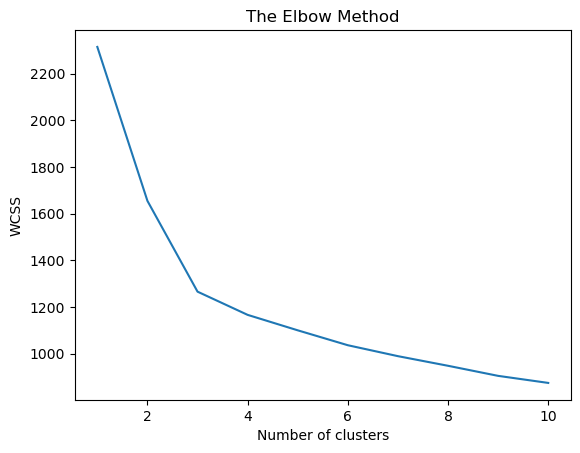

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We use the elbow method to find the optimum number of clusters and we obtain the optimum as 3.

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_avg1 = silhouette_score(data, y_kmeans)
print(silhouette_avg1)

0.28550310855094574


When KMeans clustering is done and the model is analysed, we get a silhouette score of 0.2855

Heirarchical Clustering

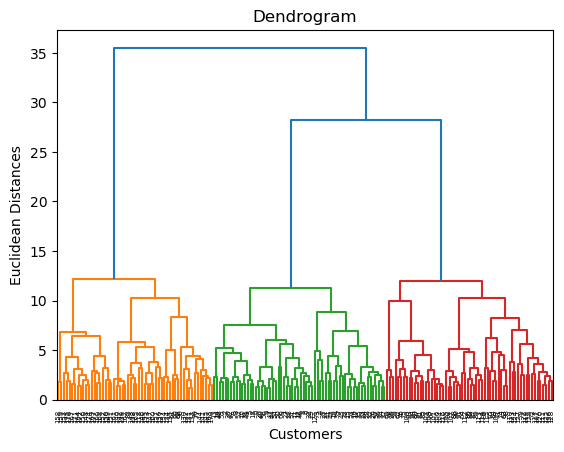

In [21]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

We use a dendrogram to find the optimum number of clusters and we obtain it as 3.

Agglomerative clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(data)

In [23]:
silhouette_avg2 = silhouette_score(data, y_hc)
print(silhouette_avg2)

0.27872059778855557


In heirarchical clustering, we did the agglomerative clustering and obtained a silhoutte score of 0.2787

DBSCAN Clustering

k - distance graph

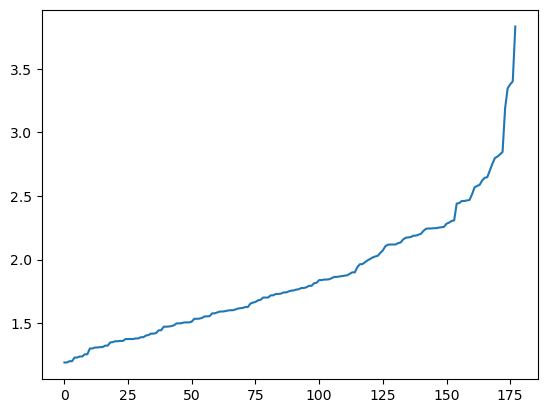

In [24]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

From the graph, the maximum slope is obtained around the value 3, so we take eps = 3 and since the dimension of our dataset is 11, we take minimum samples = 2*11 = 22

In [25]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 3 , min_samples = 22)
dbscan.fit(data)
clusters = dbscan.labels_
len(set(clusters))

3

In [26]:
silhouette_avg3 = silhouette_score(data, clusters)
print(silhouette_avg3)

0.22425994861555065


From the DBSCAN Method, we obtain a silhoutte score of 0.2242

Here, we can say that we obtained the maximum silhoutte score closer to 1 in KMeans clustering. So, it can be considered the most optimal case here.

But, if we avoid scaling the data, higher silhoutte score can be obtained in some clustering methods.

In [27]:
data = pd.read_csv(r"C:\Users\ALFRED\Downloads\Wine_clust .csv")

In [28]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
data.shape

(178, 13)

In [30]:
outlier_columns = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']

for i in outlier_columns:
    
    Q1 = np.percentile(data[i], 25, interpolation = 'midpoint')
    Q2 = np.percentile(data[i], 50, interpolation = 'midpoint')
    Q3 = np.percentile(data[i], 75, interpolation = 'midpoint')
   
    
    IQR = Q3 - Q1
    
    
    up_lim = Q3+1.5*IQR
    low_lim = Q1 - 1.5*IQR
    
    
    outliers = []
    for x in data[i]:
        if(x>up_lim) or (x<low_lim):
            outliers.append(x)
            
    data[i] = np.where(data[i]>up_lim,up_lim,np.where(data[i]<low_lim,low_lim,data[i]))

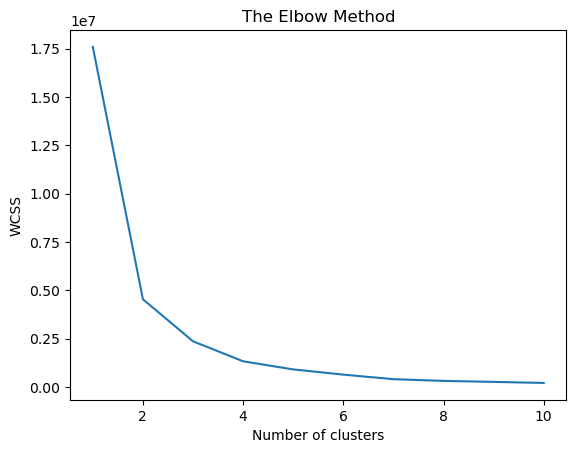

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [33]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(data, y_kmeans)
print(silhouette_avg1)

0.571610667351197


Here, we can see that we didnot apply scaling or PCA and we got a higher silhoutte score in KMeans.